# Data Cleaning - Bike Share System in the SF Bay Area

Author: Owen Hsu 

## Table of content

1. Introduction
2. Question of interest
3. Methods
4. Data Dictionary
5. Data Loading and Setup
6. Assessment
7. Handling Missing Values
8. Handing Features

## Introduction

This project aims to build a machine learning model to predict usage patterns, we can optimize bike availability through strategic redistribution, ensuring they are accessible where and when they are most needed. This approach aims to improve the user experience and promote increased bike share usage.

## Question of interest

**The analysis aims to answer this one question:** <br />
How can we leverage machine learning to accurately predict the future status of bike usage rates, thereby improving the efficiency and accessibility of the bike share system in the SF Bay Area?

This question serves as the foundational basis for our analysis, providing a framework to explore the relationships and insights within the SF Bay Area bike share dataset obtained from Kaggle: https://www.kaggle.com/datasets/benhamner/sf-bay-area-bike-share/code. 

## Methods

For this analysis, we utilized the Python programming language along with its libraries, including pandas for data manipulation, matplotlib for data visualization, and sklearn for machine learning and data preprocessing tasks. Additionally, we employed Jupyter Notebook as our integrated development environment (IDE) to facilitate interactive programming and visualization, enhancing the efficiency and effectiveness of our workflow.

## Data Dictionary

In [38]:
from IPython.core.display import HTML
table_css = 'table {align:left;display:block} '
HTML('<style>{}</style>'.format(table_css))

station.csv : Contains data that represents a station where users can pickup or return bikes.

| Columns          | Description                       |
|------------------|-----------------------------------|
| ID               | Station ID                        |
| Latitude         | The latitude of the Station       |
| Longitude        | The longitude of the Station      |
| Dock Number      | The number of docks at the station|
| City             | The city where the station is located |
| Installation Date| The installation date of the station |


<br />

status.csv : data about the number of bikes and docks available for given station and minute.

| Columns                   | Description                              |
|---------------------------|------------------------------------------|
| ID                        | Station ID                               |
| Number of Available Bikes | The number of available bikes at the station |
| Number of Available Docks | The number of available docks at the station |
| Recorded Time             | Recorded Time                            |

<br />

weather.csv : Data about the weather on a specific day for the area

| Columns                  | Description                                              |
|--------------------------|----------------------------------------------------------|
| Date                     | Recorded Date                                            |
| Max Temperature          | The highest temperature of the date                      |
| Mean Temperature         | The average temperature of the date                      |
| Min Temperature          | The lowest temperature of the date                       |
| Max Dew Point            | The highest dew point of the date                        |
| Mean Dew Point           | The average dew point of the date                        |
| Min Dew Point            | The lowest dew point of the date                         |
| Max Humidity             | The highest humidity of the date                         |
| Mean Humidity            | The average humidity of the date                         |
| Min Humidity             | The lowest humidity of the date                          |
| Max Sea Level Pressure   | The highest sea level pressure of the date               |
| Mean Sea Level Pressure  | The average sea level pressure of the date               |
| Min Sea Level Pressure   | The lowest sea level pressure of the date                |
| Max Visibility           | The maximum visibility on the date                       |
| Mean Visibility          | The average visibility of the date                       |
| Min Visibility           | The minimum visibility of the date                       |
| Max Wind Speed           | The maximum wind speed of the date                       |
| Mean Wind Speed          | The average wind speed of the date                       |
| Max Gust Speed           | The maximum gust speed of the date                       |
| Precipitation            | The precipitation of the date                            |
| Cloud Cover              | The fraction of the sky covered by clouds on given date  |
| Event                    | Description of the weather                               |
| Wind Direction           | Wind direction                                           |
| Zip Code                 | The zip code for the weather record                      |


## Data Loading and Setup

In [2]:
# Import necessary libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

/Users/chih-kanghsu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
# Read in the data from status.csv
df_status = pd.read_csv('data/status.csv')

In [41]:
# Read in the data from station.csv
df_station = pd.read_csv('data/station.csv')

In [3]:
# Read in the data from weather.csv 
df_weather = pd.read_csv('data/weather.csv')

## Assessment

#### Assessment of Status Dataset

In [43]:
# Show the shape of the status dataframe
df_status.shape

(71984434, 4)

In [44]:
# Look at the first 5 rows
df_status.head(5)

,station_id,bikes_available,docks_available,time
0,2,2,25,2013/08/29 12:06:01
1,2,2,25,2013/08/29 12:07:01
2,2,2,25,2013/08/29 12:08:01
3,2,2,25,2013/08/29 12:09:01
4,2,2,25,2013/08/29 12:10:01


In [45]:
# Get a quick overview of dataset variables
df_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71984434 entries, 0 to 71984433
Data columns (total 4 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   station_id       int64 
 1   bikes_available  int64 
 2   docks_available  int64 
 3   time             object
dtypes: int64(3), object(1)
memory usage: 2.1+ GB


In [46]:
# Display the data types of the dataset
df_status.dtypes

station_id          int64
bikes_available     int64
docks_available     int64
time               object
dtype: object

In [47]:
# Check the number of unique values in each column
df_status.nunique()

station_id              70
bikes_available         28
docks_available         28
time               1047143
dtype: int64

In [48]:
# Get a statistical summary of the dataset
df_status.describe()

,station_id,bikes_available,docks_available
count,7.198443e+07,7.198443e+07,7.198443e+07
mean,4.253149e+01,8.394812e+00,9.284729e+00
std,2.376117e+01,3.993586e+00,4.175442e+00
min,2.000000e+00,0.000000e+00,0.000000e+00
25%,2.400000e+01,6.000000e+00,6.000000e+00
50%,4.200000e+01,8.000000e+00,9.000000e+00
75%,6.300000e+01,1.100000e+01,1.200000e+01
max,8.400000e+01,2.700000e+01,2.700000e+01


In [49]:
# Sanity check to make sure we don't have any NAs
df_status.isna().sum()

station_id         0
bikes_available    0
docks_available    0
time               0
dtype: int64

In [50]:
# Check for duplicate rows
df_status.duplicated().sum()

0

Status Dataset is clean. <br />
We will need to convert time column to datetime format so that we can apply statistical modeling.

#### Assessment of Station Dataset

In [51]:
# Show the shape of the station dataframe
df_station.shape

(70, 7)

In [52]:
# Look at the first 5 rows
df_station.head(5)

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [53]:
# Get a quick overview of dataset variables
df_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 70 non-null     int64  
 1   name               70 non-null     object 
 2   lat                70 non-null     float64
 3   long               70 non-null     float64
 4   dock_count         70 non-null     int64  
 5   city               70 non-null     object 
 6   installation_date  70 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 4.0+ KB


In [54]:
# Display the data types of the dataset
df_station.dtypes

id                     int64
name                  object
lat                  float64
long                 float64
dock_count             int64
city                  object
installation_date     object
dtype: object

In [55]:
# Check the number of unique values in each column
df_station.nunique()

id                   70
name                 70
lat                  70
long                 70
dock_count            6
city                  5
installation_date    17
dtype: int64

In [56]:
# Get a statistical summary of the dataset
df_station.describe()

,id,lat,long,dock_count
count,70.000000,70.000000,70.000000,70.000000
mean,43.000000,37.590243,-122.218416,17.657143
std,24.166092,0.203473,0.209446,4.010442
min,2.000000,37.329732,-122.418954,11.000000
25%,24.250000,37.389483,-122.400601,15.000000
50%,43.500000,37.631163,-122.312123,15.000000
75%,63.750000,37.788123,-122.078009,19.000000
max,84.000000,37.804770,-121.877349,27.000000


In [57]:
# Sanity check to make sure we don't have any NAs
df_station.isna().sum()

id                   0
name                 0
lat                  0
long                 0
dock_count           0
city                 0
installation_date    0
dtype: int64

In [58]:
# Check for duplicate rows
df_station.duplicated().sum()

0

Station Dataset is clean. <br />
We are dealing with some categorical variables (stored as object as dtype). We will need to convert these to their numerical representations (aka dummy variables) so that we can apply statistical modeling.

#### Assessment of Weather Dataset

In [59]:
# Show the shape of the weather dataframe
df_weather.shape

(3665, 24)

In [60]:
# Look at the first 5 rows
df_weather.head(5)

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107


In [61]:
# Get a quick overview of dataset variables
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            3665 non-null   object 
 1   max_temperature_f               3661 non-null   float64
 2   mean_temperature_f              3661 non-null   float64
 3   min_temperature_f               3661 non-null   float64
 4   max_dew_point_f                 3611 non-null   float64
 5   mean_dew_point_f                3611 non-null   float64
 6   min_dew_point_f                 3611 non-null   float64
 7   max_humidity                    3611 non-null   float64
 8   mean_humidity                   3611 non-null   float64
 9   min_humidity                    3611 non-null   float64
 10  max_sea_level_pressure_inches   3664 non-null   float64
 11  mean_sea_level_pressure_inches  3664 non-null   float64
 12  min_sea_level_pressure_inches   36

In [62]:
# Display the data types of the dataset
df_weather.dtypes

date                               object
max_temperature_f                 float64
mean_temperature_f                float64
min_temperature_f                 float64
max_dew_point_f                   float64
mean_dew_point_f                  float64
min_dew_point_f                   float64
max_humidity                      float64
mean_humidity                     float64
min_humidity                      float64
max_sea_level_pressure_inches     float64
mean_sea_level_pressure_inches    float64
min_sea_level_pressure_inches     float64
max_visibility_miles              float64
mean_visibility_miles             float64
min_visibility_miles              float64
max_wind_Speed_mph                float64
mean_wind_speed_mph               float64
max_gust_speed_mph                float64
precipitation_inches               object
cloud_cover                       float64
events                             object
wind_dir_degrees                  float64
zip_code                          

In [63]:
# Check the number of unique values in each column
df_weather.nunique()

date                              733
max_temperature_f                  55
mean_temperature_f                 46
min_temperature_f                  45
max_dew_point_f                    45
mean_dew_point_f                   51
min_dew_point_f                    56
max_humidity                       60
mean_humidity                      72
min_humidity                       77
max_sea_level_pressure_inches      82
mean_sea_level_pressure_inches     80
min_sea_level_pressure_inches      89
max_visibility_miles               11
mean_visibility_miles              17
min_visibility_miles               13
max_wind_Speed_mph                 49
mean_wind_speed_mph                24
max_gust_speed_mph                 45
precipitation_inches               85
cloud_cover                         9
events                              5
wind_dir_degrees                  330
zip_code                            5
dtype: int64

In [64]:
# Get a statistical summary of the dataset
df_weather.describe()

,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,...,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,cloud_cover,wind_dir_degrees,zip_code
count,3661.000000,3661.000000,3661.000000,3611.000000,3611.000000,3611.000000,3611.000000,3611.000000,3611.000000,3664.000000,...,3664.000000,3652.000000,3652.000000,3652.000000,3664.000000,3664.000000,2766.000000,3664.000000,3664.000000,3665.000000
mean,70.580989,61.348812,51.947282,53.149820,48.794794,44.306840,85.446968,67.256993,46.458045,30.074997,...,29.965835,10.555312,9.822015,8.229737,16.398472,5.962063,22.299349,2.784389,266.605895,94325.000000
std,8.385572,7.234397,7.441444,6.885449,7.822281,9.355432,9.226972,10.945591,14.434784,0.134492,...,0.133476,2.193828,1.469894,2.862132,7.787588,3.340603,9.618813,2.276401,102.047645,404.615212
min,44.000000,38.000000,25.000000,20.000000,13.000000,2.000000,24.000000,24.000000,4.000000,29.500000,...,28.980000,5.000000,4.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,94041.000000
25%,64.000000,56.000000,47.000000,49.000000,44.000000,39.000000,82.000000,62.000000,37.000000,29.980000,...,29.880000,10.000000,10.000000,7.000000,13.000000,3.000000,17.000000,1.000000,254.000000,94063.000000
50%,70.000000,61.000000,53.000000,54.000000,49.000000,46.000000,86.000000,68.000000,48.000000,30.060000,...,29.950000,10.000000,10.000000,10.000000,16.000000,6.000000,22.000000,3.000000,297.000000,94107.000000
75%,77.000000,67.000000,58.000000,58.000000,55.000000,52.000000,93.000000,74.000000,56.000000,30.170000,...,30.050000,10.000000,10.000000,10.000000,20.000000,8.000000,25.000000,5.000000,330.000000,94301.000000
max,102.000000,84.000000,75.000000,68.000000,65.000000,63.000000,100.000000,96.000000,93.000000,30.650000,...,30.370000,20.000000,20.000000,20.000000,128.000000,23.000000,114.000000,8.000000,2772.000000,95113.000000


In [65]:
# Sanity check to make sure we don't have any NAs
df_weather.isna().sum()

date                                 0
max_temperature_f                    4
mean_temperature_f                   4
min_temperature_f                    4
max_dew_point_f                     54
mean_dew_point_f                    54
min_dew_point_f                     54
max_humidity                        54
mean_humidity                       54
min_humidity                        54
max_sea_level_pressure_inches        1
mean_sea_level_pressure_inches       1
min_sea_level_pressure_inches        1
max_visibility_miles                13
mean_visibility_miles               13
min_visibility_miles                13
max_wind_Speed_mph                   1
mean_wind_speed_mph                  1
max_gust_speed_mph                 899
precipitation_inches                 1
cloud_cover                          1
events                            3143
wind_dir_degrees                     1
zip_code                             0
dtype: int64

In [66]:
# Check for duplicate rows
df_weather.duplicated().sum()

0

Weather Dataset has a lot of missing data. <br />
We will need to convert time column to datetime format. In addition, we will need to convert some categorical variablesto their numerical representations (aka dummy variables) so that we can apply statistical modeling.

## Handling Missing Values

Only the weather dataset has missing values, so we will only handle the weather dataset in this step. <br />
Additionlly, since there are a lot of columns have missing values, we could first decide what feature that we need for our analysis and modeling and drop the columns that we don't need. and then start working on data cleaning. 

In [67]:
# Check the percentage of missing values in each column
df_weather.isnull().sum() / len(df_weather) * 100

date                               0.000000
max_temperature_f                  0.109141
mean_temperature_f                 0.109141
min_temperature_f                  0.109141
max_dew_point_f                    1.473397
mean_dew_point_f                   1.473397
min_dew_point_f                    1.473397
max_humidity                       1.473397
mean_humidity                      1.473397
min_humidity                       1.473397
max_sea_level_pressure_inches      0.027285
mean_sea_level_pressure_inches     0.027285
min_sea_level_pressure_inches      0.027285
max_visibility_miles               0.354707
mean_visibility_miles              0.354707
min_visibility_miles               0.354707
max_wind_Speed_mph                 0.027285
mean_wind_speed_mph                0.027285
max_gust_speed_mph                24.529332
precipitation_inches               0.027285
cloud_cover                        0.027285
events                            85.757162
wind_dir_degrees                

In [68]:
# Create a copy of the original dataframe
df_weather_clean = df_weather.copy()

# Get the columns with more than 20% missing values
cols_to_drop = df_weather_clean.columns[df_weather_clean.isnull().sum() / len(df_weather_clean) * 100 > 20]

# Drop the columns with more than 20% missing values
df_weather_clean.drop(cols_to_drop, axis=1, inplace=True)

In [69]:
df_weather_clean.shape

(3665, 22)

**Methodology:**

1. Calculate the percentage of missing values in each column - This code begins by computing the percentage of missing values in each column of the original weather dataset (df_weather). It employs the isnull() method to generate a boolean DataFrame in which True denotes missing values. It then totals the number of missing values for each column and divides this by the total number of rows in the DataFrame to determine the percentage of missing values for each column.
2. Make a duplicate of the original weather dataset. Next, the code duplicates the original weather dataset (df_weather) and assigns it to a new DataFrame named df_weather_clean. This action guarantees that the original DataFrame remains unaltered, and any adjustments are applied to the new copy.
3. Identify columns with over 20% missing values - This code identifies the columns in the df_weather_clean DataFrame that have more than 20% missing values. It utilizes boolean indexing and comparison to filter the column names that meet the condition.
4. Drop tcolumns with over 20% missing values - This code removes the identified columns with more than 20% missing values from  df_weather_clean using the drop() method, with the cols_to_drop variable containing the column names to be dropped.
5. Look up the df_weather_clean's shape - Following dropping columns with over 20% missing values, the code shows the shape of the cleaned dataset. 

<br />

**Findings:**

1. The original weather dataset (df_weather) had 3,665 rows and a total of 24 columns.

2. The cleaned dataset (df_weather_clean) has 3,665 rows and 22 columns after data cleaning and dropping the columns with more than 20% missing values.

In [70]:
# Check the percentage of missing values in each column
df_weather_clean.isnull().sum() / len(df_weather_clean) * 100

date                              0.000000
max_temperature_f                 0.109141
mean_temperature_f                0.109141
min_temperature_f                 0.109141
max_dew_point_f                   1.473397
mean_dew_point_f                  1.473397
min_dew_point_f                   1.473397
max_humidity                      1.473397
mean_humidity                     1.473397
min_humidity                      1.473397
max_sea_level_pressure_inches     0.027285
mean_sea_level_pressure_inches    0.027285
min_sea_level_pressure_inches     0.027285
max_visibility_miles              0.354707
mean_visibility_miles             0.354707
min_visibility_miles              0.354707
max_wind_Speed_mph                0.027285
mean_wind_speed_mph               0.027285
precipitation_inches              0.027285
cloud_cover                       0.027285
wind_dir_degrees                  0.027285
zip_code                          0.000000
dtype: float64

We start investigating the columns with relatively high missing values comparing to the rest of the dataset:

1. max_dew_point_f   (~1.47% of the rows are missing)
2. mean_dew_point_f  (~1.47% of the rows are missing)
3. min_dew_point_f   (~1.47% of the rows are missing)
4. max_humidity      (~1.47% of the rows are missing)
5. mean_humidity     (~1.47% of the rows are missing)
6. min_humidity      (~1.47% of the rows are missing)

**Interpretation of the column:**<br /><br />
The columns of max_dew_point_f, mean_dew_point_f, and min_dew_point_f refer to the highest, average, and the lowest dew point of the date. 
<br />
The columns of max_humidity, mean_humidity, and min_humidity refer to the highest, average, and the lowest humidity of the date.

**Decision on data handling:** <br /><br />
Due to the absence of recorded time in the weather dataset, it is impossible to ascertain the specific time of day when the maximum or minimum dew point and humidity values were recorded. Therefore, these columns are not useful for bike station usage rate analysis. <br />
On the other hand, we can use the average dew point and humidity of the date for our analysis.
We have decided to keep the columns mean_dew_point_f and mean_humidity and drop the following columns: max_dew_point_f, min_dew_point_f, max_humidity, and min_humidity.

In [71]:
# drop the columns max_dew_point_f, min_dew_point_f, max_humidity, and min_humidity
df_weather_clean.drop(['max_dew_point_f', 'min_dew_point_f', 'max_humidity', 'min_humidity'], axis=1, inplace=True)

We apply the same concept and approach to handle the following columns:
- Temperature columns (max_temperature_f, mean_temperature_f, and min_temperature_f)
- Sea level pressure columns (max_sea_level_pressure_inches, mean_sea_level_pressure_inches, and min_sea_level_pressure_inches)
- Visibility columns (max_visibility_miles, mean_visibility_miles, and min_visibility_miles)
- Wind speed columns (max_wind_Speed_mph and mean_wind_speed_mph)

Columns that need to be dropped are: max_temperature_f, min_temperature_f, max_sea_level_pressure_inches, min_sea_level_pressure_inches, max_visibility_miles, min_visibility_miles, and max_wind_Speed_mph.

In [72]:
# drop the columns max_temperature_f and min_temperature_f
df_weather_clean.drop(['max_temperature_f', 'min_temperature_f', 'max_sea_level_pressure_inches', 
                       'min_sea_level_pressure_inches', 'max_visibility_miles', 'min_visibility_miles', 'max_wind_Speed_mph'],
                      axis=1, inplace=True)

In [73]:
# Get the columns with less than 20% missing values
cols_to_fill = df_weather_clean.columns[df_weather_clean.isnull().sum() / len(df_weather_clean) * 100 < 20]

# Fill the missing values with the mean of the respective columns for float columns
for col in cols_to_fill:
    if df_weather_clean[col].dtype == 'float64':
        df_weather_clean[col].fillna(df_weather_clean[col].mean(), inplace=True)

# Check the percentage of missing values in each column 
df_weather_clean.isnull().sum() / len(df_weather_clean) * 100

date                              0.000000
mean_temperature_f                0.000000
mean_dew_point_f                  0.000000
mean_humidity                     0.000000
mean_sea_level_pressure_inches    0.000000
mean_visibility_miles             0.000000
mean_wind_speed_mph               0.000000
precipitation_inches              0.027285
cloud_cover                       0.000000
wind_dir_degrees                  0.000000
zip_code                          0.000000
dtype: float64

Let's investigate the precipitation column, which is currently the only column with missing values in the dataset.

In [74]:
# Display the data types of the dataset
df_weather_clean.dtypes

date                               object
mean_temperature_f                float64
mean_dew_point_f                  float64
mean_humidity                     float64
mean_sea_level_pressure_inches    float64
mean_visibility_miles             float64
mean_wind_speed_mph               float64
precipitation_inches               object
cloud_cover                       float64
wind_dir_degrees                  float64
zip_code                            int64
dtype: object

We notice that the precipitation column is in object format, and we will have to check the value of it.

In [75]:
# Check all distinct values in the precipitation_inches column 
df_weather_clean['precipitation_inches'].value_counts()

precipitation_inches
0       3231
T        143
0.01      65
0.02      29
0.03      13
        ... 
0.74       1
1.18       1
1.43       1
3.12       1
0.39       1
Name: count, Length: 85, dtype: int64

In [76]:
# Calculate the percentage of distinct values in the precipitation_inches column
print(df_weather_clean['precipitation_inches'].value_counts() / df_weather_clean['precipitation_inches'].count())

precipitation_inches
0       0.881823
T       0.039028
0.01    0.017740
0.02    0.007915
0.03    0.003548
          ...   
0.74    0.000273
1.18    0.000273
1.43    0.000273
3.12    0.000273
0.39    0.000273
Name: count, Length: 85, dtype: float64


In [77]:
# Filter rows in df_weather_clean where the 'precipitation_inches' column has a value of 'T'.  
df_weather_clean.loc[df_weather_clean['precipitation_inches']== "T"]

,date,mean_temperature_f,mean_dew_point_f,mean_humidity,mean_sea_level_pressure_inches,mean_visibility_miles,mean_wind_speed_mph,precipitation_inches,cloud_cover,wind_dir_degrees,zip_code
32,9/30/2013,66.0,57.0,69.0,30.03,10.0,10.0,T,4.0,264.0,94107
59,10/27/2013,55.0,47.0,76.0,29.90,10.0,18.0,T,6.0,267.0,94107
75,11/12/2013,64.0,50.0,62.0,30.23,10.0,7.0,T,4.0,312.0,94107
84,11/21/2013,56.0,42.0,64.0,29.94,10.0,11.0,T,5.0,349.0,94107
95,12/2/2013,54.0,49.0,80.0,30.10,8.0,14.0,T,5.0,277.0,94107
...,...,...,...,...,...,...,...,...,...,...,...
3611,7/9/2015,68.0,54.0,66.0,29.87,10.0,8.0,T,7.0,281.0,95113
3612,7/10/2015,67.0,55.0,68.0,29.92,10.0,7.0,T,6.0,308.0,95113
3621,7/19/2015,77.0,57.0,56.0,30.03,10.0,6.0,T,5.0,291.0,95113
3633,7/31/2015,71.0,59.0,69.0,30.00,10.0,7.0,T,4.0,312.0,95113


**Interpretation of the column:**<br /><br />
The columns of precipitation_inches refer to the precipitation of the date. <br />
We noticed that there are around 4% of data shows "T" in the 'precipitation_inches' column. In weather data, "T" typically represents a trace amount of precipitation. This means that there was some precipitation, but it was so small that it is not measurable in inches. It is used to indicate that there was some moisture in the air or a few drops of rain, but not enough to register as a measurable amount.

**Decision on data handling:** <br /><br />
We will convert this column into a binary one, where 1 represents there are precipitation and 0 represents there are not.


In [78]:
# Convert the 'precipitation_inches' column to a binary indicator
df_weather_clean['precipitation_inches'] = np.where(df_weather_clean['precipitation_inches'] == '0', 0, 1)

In [79]:
# Check all distinct values in the precipitation_inches column 
df_weather_clean['precipitation_inches'].value_counts()

precipitation_inches
0    3231
1     434
Name: count, dtype: int64

In [80]:
# Calculate the percentage of distinct values in the precipitation_inches column
print(df_weather_clean['precipitation_inches'].value_counts() / df_weather_clean['precipitation_inches'].count())

precipitation_inches
0    0.881583
1    0.118417
Name: count, dtype: float64


In [81]:
# Check the percentage of missing values in each column 
df_weather_clean.isnull().sum() / len(df_weather_clean) * 100

date                              0.0
mean_temperature_f                0.0
mean_dew_point_f                  0.0
mean_humidity                     0.0
mean_sea_level_pressure_inches    0.0
mean_visibility_miles             0.0
mean_wind_speed_mph               0.0
precipitation_inches              0.0
cloud_cover                       0.0
wind_dir_degrees                  0.0
zip_code                          0.0
dtype: float64

All missing values in the dataset have been addressed. The datasets are now cleaned and ready to be merged and for use in EDA.

## Handing Features

#### Fearures - Status Dataset

In [5]:
# Convert time column to datetime format
df_status['time'] = pd.to_datetime(df_status['time'], format='%Y-%m-%d %H:%M:%S', errors='coerce').fillna(pd.to_datetime(df_status['time'], format='%Y/%m/%d %H:%M:%S', errors='coerce'))

In [6]:
# Get a overview of dataset variables to confirm time column is in datetime format
df_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71984434 entries, 0 to 71984433
Data columns (total 4 columns):
 #   Column           Dtype         
---  ------           -----         
 0   station_id       int64         
 1   bikes_available  int64         
 2   docks_available  int64         
 3   time             datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.1 GB


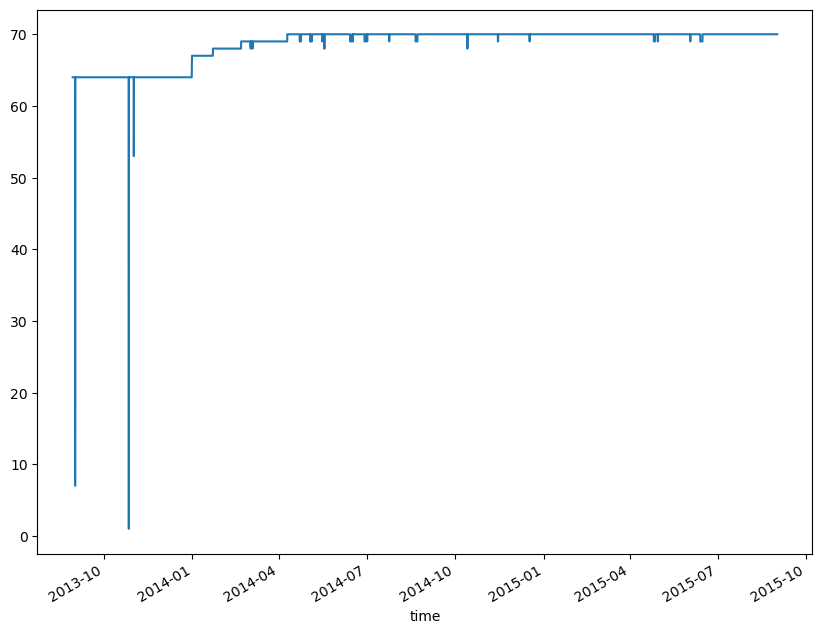

In [7]:
# Plot number of bike share records per time in dataset
plt.figure(figsize=(10,8))
df_status['time'].value_counts().sort_index().plot()
plt.show()

We need one year of data. As we can see, not all times are equally represented in the original dataset. Because of this, we will filter the dataset to only include data between 5/1/2014 and 4/30/2015.

In [8]:
# Filter the data to keep only rows between 5/1/2014 and 4/30/2015
filtered_df_status = df_status[(df_status['time'] >= '2014-05-01') & (df_status['time'] < '2015-05-01')].copy()

In [9]:
# Drop the index
filtered_df_status.reset_index(drop=True, inplace=True)

In [10]:
# Get a quick overview of filtered dataset variables
filtered_df_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36673878 entries, 0 to 36673877
Data columns (total 4 columns):
 #   Column           Dtype         
---  ------           -----         
 0   station_id       int64         
 1   bikes_available  int64         
 2   docks_available  int64         
 3   time             datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.1 GB


In [11]:
# Look at the first 5 rows to confirm the date/time range
filtered_df_status.head()

,station_id,bikes_available,docks_available,time
0,2,12,15,2014-05-01 00:00:04
1,2,12,15,2014-05-01 00:01:01
2,2,12,15,2014-05-01 00:02:03
3,2,12,15,2014-05-01 00:03:03
4,2,12,15,2014-05-01 00:04:02


In [12]:
# Look at the last 5 rows to confirm the date/time range
filtered_df_status.tail()

,station_id,bikes_available,docks_available,time
36673873,84,9,6,2015-04-30 23:55:02
36673874,84,9,6,2015-04-30 23:56:03
36673875,84,9,6,2015-04-30 23:57:02
36673876,84,9,6,2015-04-30 23:58:02
36673877,84,9,6,2015-04-30 23:59:02


In [13]:
# Show the shape of filtered_df_status
filtered_df_status.shape

(36673878, 4)

In [14]:
# Set time column as the index
filtered_df_status.set_index('time', inplace=True)

In [15]:
# Resample the filtered_df_status by every 5 minutes and calculate the means
resampled_df_status = filtered_df_status.groupby('station_id', as_index=False).resample('5T').mean()

/var/folders/ct/6pbvl36n32d1x96vhqy1v4c80000gn/T/ipykernel_57913/3100819530.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df_status = filtered_df_status.groupby('station_id', as_index=False).resample('5T').mean()


In [16]:
# Look at the first 5 rows
resampled_df_status.head()

station_id  bikes_available  docks_available
  time                                                             
0 2014-05-01 00:00:00         2.0             12.0             15.0
  2014-05-01 00:05:00         2.0             12.0             15.0
  2014-05-01 00:10:00         2.0             12.0             15.0
  2014-05-01 00:15:00         2.0             12.0             15.0
  2014-05-01 00:20:00         2.0             12.0             15.0

In [17]:
# Drop rows with missing values in 'station_id'
resampled_df_status.dropna(subset=['station_id'], inplace=True)

In [18]:
# Reset the index
resampled_df_status.reset_index(inplace=True)

In [19]:
# Look at the first 5 rows
resampled_df_status.head()

,level_0,time,station_id,bikes_available,docks_available
0,0,2014-05-01 00:00:00,2.0,12.0,15.0
1,0,2014-05-01 00:05:00,2.0,12.0,15.0
2,0,2014-05-01 00:10:00,2.0,12.0,15.0
3,0,2014-05-01 00:15:00,2.0,12.0,15.0
4,0,2014-05-01 00:20:00,2.0,12.0,15.0


In [20]:
# Drop the level_0 column
resampled_df_status.drop(columns=['level_0'], inplace=True)
# Convert station_id back to integer
resampled_df_status['station_id'] = resampled_df_status['station_id'].astype(int)
# Convert bikes_available to integers and round the numbers
resampled_df_status['bikes_available'] = resampled_df_status['bikes_available'].round().astype(int)
# Convert docks_available to integers and round the numbers
resampled_df_status['docks_available'] = resampled_df_status['docks_available'].round().astype(int)

In [21]:
# Look at the first 5 rows
resampled_df_status.head()

,time,station_id,bikes_available,docks_available
0,2014-05-01 00:00:00,2,12,15
1,2014-05-01 00:05:00,2,12,15
2,2014-05-01 00:10:00,2,12,15
3,2014-05-01 00:15:00,2,12,15
4,2014-05-01 00:20:00,2,12,15


In [22]:
# Show the shape of resampled_df_status
resampled_df_status.shape

(7337194, 4)

In [23]:
# Sanity check to make sure we don't have any NAs
resampled_df_status.isna().sum()

time               0
station_id         0
bikes_available    0
docks_available    0
dtype: int64

In [24]:
# Get a quick overview of dataset variables
resampled_df_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7337194 entries, 0 to 7337193
Data columns (total 4 columns):
 #   Column           Dtype         
---  ------           -----         
 0   time             datetime64[ns]
 1   station_id       int64         
 2   bikes_available  int64         
 3   docks_available  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 223.9 MB


#### Features - Station Dataset

After carefulling examining the columns in station dataset, we make the argument that our model can use station ID to represent geographical differences. Therefore, we discard the following columns: 
- name
- lat
- long
- installation_date

In [105]:
# Drop the name column
df_station.drop('name', axis=1, inplace=True)

In [106]:
# Drop the lat column
df_station.drop('lat', axis=1, inplace=True)

In [107]:
# Drop the long column
df_station.drop('long', axis=1, inplace=True)

In [108]:
# Drop the installation_date column
df_station.drop('installation_date', axis=1, inplace=True)

In [109]:
# Look at the first 5 rows
df_station.head(5)

,id,dock_count,city
0,2,27,San Jose
1,3,15,San Jose
2,4,11,San Jose
3,5,19,San Jose
4,6,15,San Jose


In [110]:
df_station['city'].value_counts()

city
San Francisco    35
San Jose         16
Redwood City      7
Mountain View     7
Palo Alto         5
Name: count, dtype: int64

#### Features - Weather Dataset

We need to convert date column to datetime format.

In [111]:
# Convert date column to datetime format
df_weather_clean['date'] = pd.to_datetime(df_weather_clean['date'])

In [112]:
df_weather_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            3665 non-null   datetime64[ns]
 1   mean_temperature_f              3665 non-null   float64       
 2   mean_dew_point_f                3665 non-null   float64       
 3   mean_humidity                   3665 non-null   float64       
 4   mean_sea_level_pressure_inches  3665 non-null   float64       
 5   mean_visibility_miles           3665 non-null   float64       
 6   mean_wind_speed_mph             3665 non-null   float64       
 7   precipitation_inches            3665 non-null   int64         
 8   cloud_cover                     3665 non-null   float64       
 9   wind_dir_degrees                3665 non-null   float64       
 10  zip_code                        3665 non-null   int64         
dtypes: d

After examining the columns in the weather dataset, we argue that our model will not incorporate differences in wind direction in bike station usage. Thus, we will discard the wind_dir_degrees column.

In [113]:
# Drop the wind_dir_degrees column
df_weather_clean.drop('wind_dir_degrees', axis=1, inplace=True)

We will create a new column called 'city' in df_weather_clean so that we can look up the weather information for a certain date after merging all three datasets.

In [114]:
df_weather_clean['zip_code'].value_counts()

zip_code
94107    733
94063    733
94301    733
94041    733
95113    733
Name: count, dtype: int64

In [115]:
# Define the conditions and corresponding values
conditions = [
    (df_weather_clean['zip_code'] == 94107),
    (df_weather_clean['zip_code'] == 94063),
    (df_weather_clean['zip_code'] == 94301),
    (df_weather_clean['zip_code'] == 94041),
    (df_weather_clean['zip_code'] == 95113)
]
values = ['San Francisco', 'Redwood City', 'Palo Alto', 'Mountain View', 'San Jose']

# Create the new 'city' column based on the conditions
df_weather_clean['city'] = np.select(conditions, values, default=None)

In [116]:
# Look up the zip code and corresponding city in the dataset
df_weather_clean[['zip_code','city']].value_counts()

zip_code  city         
94041     Mountain View    733
94063     Redwood City     733
94107     San Francisco    733
94301     Palo Alto        733
95113     San Jose         733
Name: count, dtype: int64

In [117]:
# Look at the first 5 rows
df_weather_clean.head()

,date,mean_temperature_f,mean_dew_point_f,mean_humidity,mean_sea_level_pressure_inches,mean_visibility_miles,mean_wind_speed_mph,precipitation_inches,cloud_cover,zip_code,city
0,2013-08-29,68.0,58.0,75.0,30.02,10.0,11.0,0,4.0,94107,San Francisco
1,2013-08-30,69.0,58.0,70.0,30.00,10.0,13.0,0,2.0,94107,San Francisco
2,2013-08-31,64.0,56.0,75.0,29.96,10.0,15.0,0,4.0,94107,San Francisco
3,2013-09-01,66.0,56.0,68.0,29.93,10.0,13.0,0,4.0,94107,San Francisco
4,2013-09-02,69.0,60.0,77.0,29.94,10.0,12.0,0,6.0,94107,San Francisco


## Merging Datasets

Let's merge these three datasets. First, we will start by merging the status dataset and the station dataset using the station ID.

In [118]:
# Merge the two dataset on the common column 'station_id' and 'id'
merged_df = pd.merge(resampled_df_status, df_station, left_on='station_id', right_on='id', how='inner')

In [119]:
# Drop the redundant 'id' column
merged_df = merged_df.drop(columns=['id'])

In [120]:
# Look at the first 5 rows of the merged dataset
merged_df.head()

,time,station_id,bikes_available,docks_available,dock_count,city
0,2014-05-01 00:00:00,2,12,15,27,San Jose
1,2014-05-01 00:05:00,2,12,15,27,San Jose
2,2014-05-01 00:10:00,2,12,15,27,San Jose
3,2014-05-01 00:15:00,2,12,15,27,San Jose
4,2014-05-01 00:20:00,2,12,15,27,San Jose


Next, we merge the weather dataset with the merged dataset using the date/time and city. <br />
As we can see that merge_df has only one columne 'time' for date and time. We will need to separate it and create 'date' and 'time' columns from column 'time' so that we can merge it with weather dataset and keep the time information. 

In [121]:
# Create a copy of the original dataframe
merged_df_datetime = merged_df.copy()

# Create 'date' and 'time' columns in merged_df
merged_df_datetime['date'] = merged_df['time'].dt.date

# Convert 'date' column to datetime format
merged_df_datetime['date'] = pd.to_datetime(merged_df_datetime['date'])

In [122]:
# Look at the first 5 rows of the merged dataset
merged_df_datetime.head()

,time,station_id,bikes_available,docks_available,dock_count,city,date
0,2014-05-01 00:00:00,2,12,15,27,San Jose,2014-05-01
1,2014-05-01 00:05:00,2,12,15,27,San Jose,2014-05-01
2,2014-05-01 00:10:00,2,12,15,27,San Jose,2014-05-01
3,2014-05-01 00:15:00,2,12,15,27,San Jose,2014-05-01
4,2014-05-01 00:20:00,2,12,15,27,San Jose,2014-05-01


In [123]:
# Merge the two datasets on the common columns: 'date' and 'city'
final_df = pd.merge(merged_df_datetime, df_weather_clean, on=['date', 'city'], how='inner')

# Display the merged dataset
final_df.head()

,time,station_id,bikes_available,docks_available,dock_count,city,date,mean_temperature_f,mean_dew_point_f,mean_humidity,mean_sea_level_pressure_inches,mean_visibility_miles,mean_wind_speed_mph,precipitation_inches,cloud_cover,zip_code
0,2014-05-01 00:00:00,2,12,15,27,San Jose,2014-05-01,75.0,45.0,41.0,30.06,10.0,6.0,0,3.0,95113
1,2014-05-01 00:05:00,2,12,15,27,San Jose,2014-05-01,75.0,45.0,41.0,30.06,10.0,6.0,0,3.0,95113
2,2014-05-01 00:10:00,2,12,15,27,San Jose,2014-05-01,75.0,45.0,41.0,30.06,10.0,6.0,0,3.0,95113
3,2014-05-01 00:15:00,2,12,15,27,San Jose,2014-05-01,75.0,45.0,41.0,30.06,10.0,6.0,0,3.0,95113
4,2014-05-01 00:20:00,2,12,15,27,San Jose,2014-05-01,75.0,45.0,41.0,30.06,10.0,6.0,0,3.0,95113


In [124]:
# Show the shape of the dataframe
final_df.shape

(7337194, 16)

In [125]:
# Get a overview of merged dataset variables
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7337194 entries, 0 to 7337193
Data columns (total 16 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   time                            datetime64[ns]
 1   station_id                      int64         
 2   bikes_available                 int64         
 3   docks_available                 int64         
 4   dock_count                      int64         
 5   city                            object        
 6   date                            datetime64[ns]
 7   mean_temperature_f              float64       
 8   mean_dew_point_f                float64       
 9   mean_humidity                   float64       
 10  mean_sea_level_pressure_inches  float64       
 11  mean_visibility_miles           float64       
 12  mean_wind_speed_mph             float64       
 13  precipitation_inches            int64         
 14  cloud_cover                     float64       
 15

We can now drop the 'city' column, which has a datatype of object, and just use the zip code to represent each city.

In [126]:
# Drop the city column 
final_df.drop('city', axis=1, inplace=True)

In [127]:
# Show the shape of the dataframe
final_df.shape

(7337194, 15)

In [128]:
# Get a overview of merged dataset variables
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7337194 entries, 0 to 7337193
Data columns (total 15 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   time                            datetime64[ns]
 1   station_id                      int64         
 2   bikes_available                 int64         
 3   docks_available                 int64         
 4   dock_count                      int64         
 5   date                            datetime64[ns]
 6   mean_temperature_f              float64       
 7   mean_dew_point_f                float64       
 8   mean_humidity                   float64       
 9   mean_sea_level_pressure_inches  float64       
 10  mean_visibility_miles           float64       
 11  mean_wind_speed_mph             float64       
 12  precipitation_inches            int64         
 13  cloud_cover                     float64       
 14  zip_code                        int64         
dty

After merging all three datasets, there are 7337194 rows and 15 features left in the final dataset. <br />
Let's save this cleaned and merged dataset for later use.

In [129]:
# Save the cleaned and merged data to a parquet file
final_df.to_parquet('data/BikeData_after_DataCleaning.parquet')